# ЗАДАНИЕ 9. ПОСТРОЕНИЕ МОДЕЛИ МНК С ДИСКОНТИРОВАНИЕМ, МОДЕЛИ БРАУНА И МОДЕЛИ ХОЛЬТА

In [68]:
import os
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from scipy.optimize import differential_evolution, minimize
import scipy

In [69]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [70]:
data = pd.read_excel('data.xls', sheet_name='Income')
data.head()

,Unnamed: 0,Unnamed: 1,Доход в сегментах потребителей,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,10186.17,10249.57,10353.63,10213.59,10372.17,10126.11,10251.93,10460.49,...,15613.85,15460.56,15259.08,15659.55,15251.75,15250.42,15557.11,16170.13,16232.2,16284.05
2,NaN,2.0,10271.13,10167.57,10265.43,10435.41,11796.99,11610.9,11570.45,11894.32,...,13057.65,13086.87,13081.26,13234.97,13258.96,13592.37,13331.28,13362.99,13546.65,13333.41
3,NaN,3.0,10140.21,9985.64,10373.08,10430.68,10333.64,10145.77,10537.43,10619.98,...,15769.61,15667.17,15632.69,15411.46,15424.27,15483.68,15507.53,15449.43,15622.67,15647.86
4,NaN,4.0,10127.63,10115.27,10398.24,10082.89,10157.57,10254.27,10570.57,10719.39,...,13894.22,13888.91,13997.95,13999.53,13928.6,13834.72,13940.36,14091.68,14158.49,14170.32


In [71]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [72]:
data={"Date": dates, "Value": val}

In [73]:
my_data = pd.DataFrame(data)
my_data.head()

,Date,Value
0,2007-01-01,10186.17
1,2007-02-01,10249.57
2,2007-03-01,10353.63
3,2007-04-01,10213.59
4,2007-05-01,10372.17


In [74]:
my_data=my_data.set_index('Date')
my_data.head()

,Value
Date,
2007-01-01,10186.17
2007-02-01,10249.57
2007-03-01,10353.63
2007-04-01,10213.59
2007-05-01,10372.17


In [75]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [76]:
my_data.Value=my_data.Value.astype(float)

In [77]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


## Построим линейный тренд, используя МНК с дисконтированием данных

In [78]:
alpha = 0.9
my_data['t'] = np.array([i for i in range(1, len(my_data) + 1)])
my_data['v'] = np.array([alpha * (1 - alpha)**(len(my_data)-i) for i in range(1, len(my_data) + 1)])
b = (np.sum(my_data['t'] * my_data['v'] * my_data['Value']) - np.sum(my_data['t'] * my_data['v']) * np.sum(my_data['Value'] * my_data['v'])) / (np.sum(np.power(my_data['t'], 2) * my_data['v']) - np.power(np.sum(my_data['t'] * my_data['v']), 2))
a = np.sum(my_data['Value'] * my_data['v']) - b * np.sum(my_data['t'] * my_data['v'])
print(a, b)

13024.716032800883 67.92567204841299


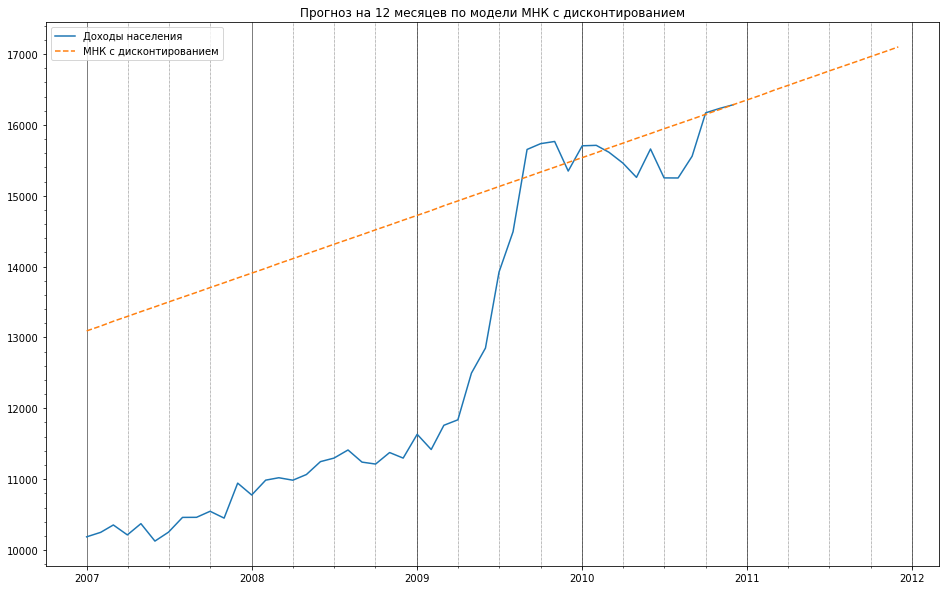

In [79]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(my_data) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

In [80]:
t_new = np.arange(len(my_data) + 1,len(my_data)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [81]:
y_new=a+b*t_new
y_new

array([16353.07396317, 16420.99963522, 16488.92530727, 16556.85097932,
       16624.77665137, 16692.70232342, 16760.62799546, 16828.55366751,
       16896.47933956, 16964.40501161, 17032.33068366, 17100.25635571])

## Построим модель Брауна (модель экспоненциального сглаживания)

https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9

In [82]:
span=10
alfa=2/(span+1)
alfa

0.18181818181818182

In [83]:
ema = my_data['Value'].ewm(span=span).mean()
ema.head()

Date
2007-01-01    10186.170000
2007-02-01    10221.040000
2007-03-01    10274.340299
2007-04-01    10254.325782
2007-05-01    10288.155652
Name: Value, dtype: float64

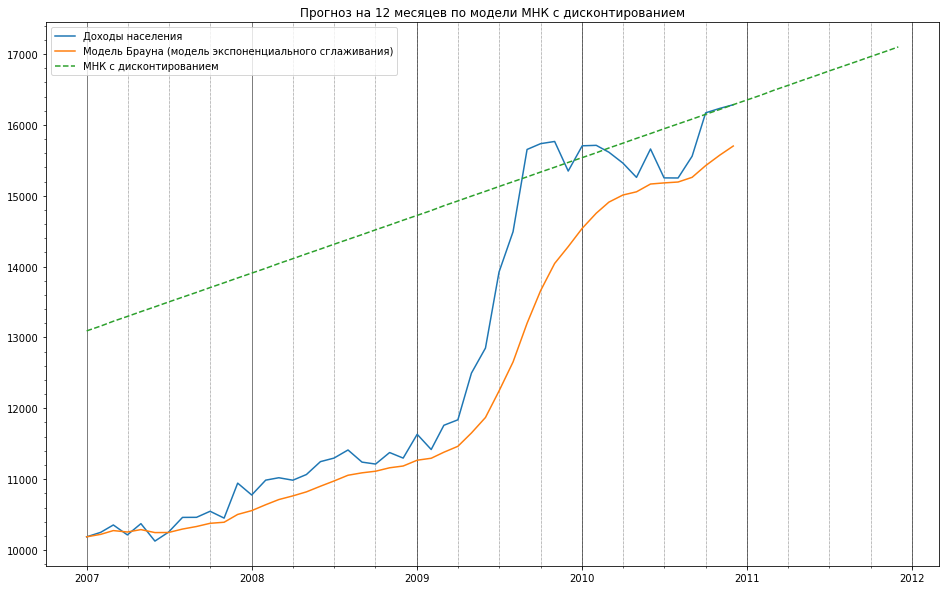

In [84]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(ema,label = 'Модель Брауна (модель экспоненциального сглаживания)')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(my_data) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

In [85]:
span=3
alfa=2/(span+1)
alfa

0.5

In [86]:
ema = my_data['Value'].ewm(span=span).mean()
ema.head()

Date
2007-01-01    10186.170000
2007-02-01    10228.436667
2007-03-01    10299.975714
2007-04-01    10253.903333
2007-05-01    10314.944194
Name: Value, dtype: float64

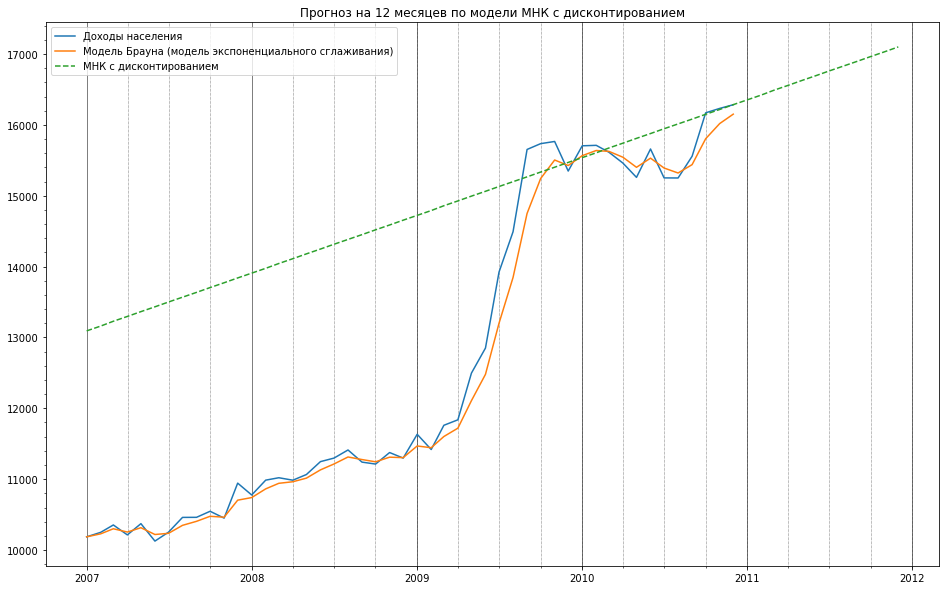

In [87]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(ema,label = 'Модель Брауна (модель экспоненциального сглаживания)')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(my_data) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

Параметры оптимизированной модели:

In [88]:
tidx = pd.DatetimeIndex(my_data.index, freq='infer')
tidx

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

In [89]:
my_data['Value'].index=tidx

In [90]:
model=SimpleExpSmoothing(my_data['Value'],initialization_method="estimated").fit()

In [91]:
model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995000,True
initial_level,l.0,10151.099333,True


$l_ 0 = 10186.17$

Начальный уровень подбирается исходя из минимизации оcтатков и не имеет особой интерпритации

$\alpha = 0.995$

Параметр $\alpha$ близок к единице, что означает что больший вес имеют последние наблюдения


In [92]:
y_pred=model.fittedvalues
y_pred.head()

Date
2007-01-01    10151.099333
2007-02-01    10185.994647
2007-03-01    10249.252123
2007-04-01    10353.108111
2007-05-01    10214.287591
Freq: MS, dtype: float64

In [93]:
y=my_data['Value']
y.head()

Date
2007-01-01    10186.17
2007-02-01    10249.57
2007-03-01    10353.63
2007-04-01    10213.59
2007-05-01    10372.17
Freq: MS, Name: Value, dtype: float64

In [94]:
MSE = mean_squared_error(y, y_pred)
print('MSE: %f' % MSE)

MSE: 114525.867659


In [95]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print('RMSE: %f' % RMSE)

RMSE: 338.416707


In [96]:
model.predict(start=48, end=59)

2011-01-01    16283.789121
2011-02-01    16283.789121
2011-03-01    16283.789121
2011-04-01    16283.789121
2011-05-01    16283.789121
2011-06-01    16283.789121
2011-07-01    16283.789121
2011-08-01    16283.789121
2011-09-01    16283.789121
2011-10-01    16283.789121
2011-11-01    16283.789121
2011-12-01    16283.789121
Freq: MS, dtype: float64

In [97]:
model.forecast(12)

2011-01-01    16283.789121
2011-02-01    16283.789121
2011-03-01    16283.789121
2011-04-01    16283.789121
2011-05-01    16283.789121
2011-06-01    16283.789121
2011-07-01    16283.789121
2011-08-01    16283.789121
2011-09-01    16283.789121
2011-10-01    16283.789121
2011-11-01    16283.789121
2011-12-01    16283.789121
Freq: MS, dtype: float64

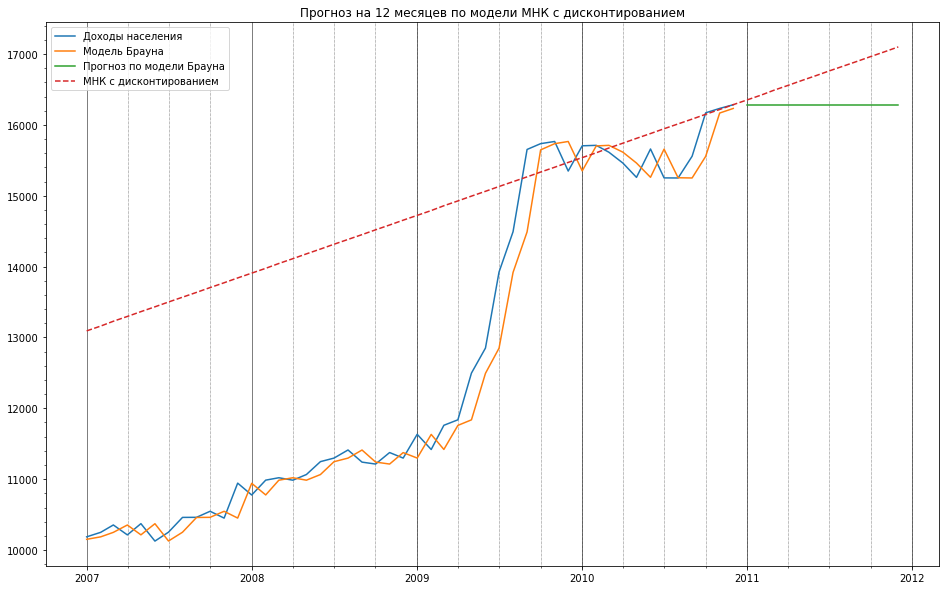

In [98]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(model.fittedvalues,label = 'Модель Брауна')
ax.plot(model.predict(start=48, end=59),label = 'Прогноз по модели Брауна')
ax.plot(a + b * pd.Series(np.array([i for i in range(1, len(my_data) + 13)]), pd.date_range(start='2007-01', end='2011-12', freq = 'MS')), label = 'МНК с дисконтированием', linestyle = '--')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели МНК с дисконтированием')

plt.show()

## Построим модель Хольта

In [99]:
model=Holt(my_data['Value'],initialization_method="estimated").fit()

In [100]:
y_pred=model.fittedvalues
y_pred.head()

Date
2007-01-01    10194.418929
2007-02-01    10224.813786
2007-03-01    10293.925875
2007-04-01    10417.601016
2007-05-01    10229.406794
Freq: MS, dtype: float64

In [101]:
y=my_data['Value']
y.head()

Date
2007-01-01    10186.17
2007-02-01    10249.57
2007-03-01    10353.63
2007-04-01    10213.59
2007-05-01    10372.17
Freq: MS, Name: Value, dtype: float64

In [102]:
MSE = mean_squared_error(y, y_pred)
print('MSE: %f' % MSE)

MSE: 100199.764593


In [103]:
# calculate root mean squared error
RMSE = sqrt(MSE)
print('RMSE: %f' % RMSE)

RMSE: 316.543464


In [104]:
model.predict(start=48, end=59)

2011-01-01    16469.202889
2011-02-01    16626.138436
2011-03-01    16783.073984
2011-04-01    16940.009532
2011-05-01    17096.945080
2011-06-01    17253.880628
2011-07-01    17410.816175
2011-08-01    17567.751723
2011-09-01    17724.687271
2011-10-01    17881.622819
2011-11-01    18038.558366
2011-12-01    18195.493914
Freq: MS, dtype: float64

In [105]:
y_new=model.forecast(12)
y_new

2011-01-01    16469.202889
2011-02-01    16626.138436
2011-03-01    16783.073984
2011-04-01    16940.009532
2011-05-01    17096.945080
2011-06-01    17253.880628
2011-07-01    17410.816175
2011-08-01    17567.751723
2011-09-01    17724.687271
2011-10-01    17881.622819
2011-11-01    18038.558366
2011-12-01    18195.493914
Freq: MS, dtype: float64

In [106]:
# save the forcast
np.save('income_new.npy', model.forecast(12))

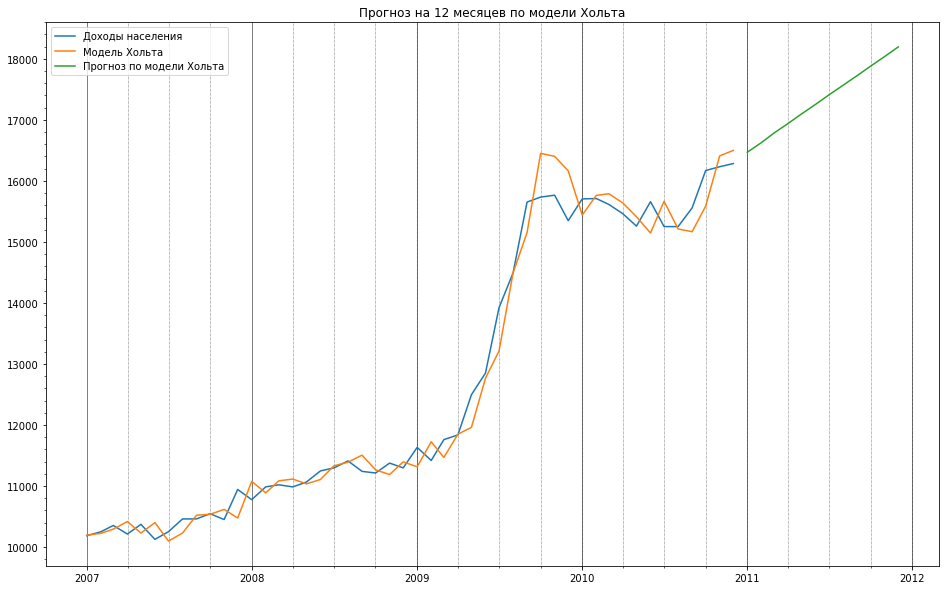

In [107]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(model.fittedvalues,label = 'Модель Хольта')
ax.plot(model.predict(start=48, end=59),label = 'Прогноз по модели Хольта')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта')

plt.show()

<p><a name="Intervals"></a></p>

# Построение интервального прогноза

$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n-1} $$
-выборочная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [108]:
sigma=scipy.stats.sem(y)
sigma

329.7461081311333

In [109]:
confidence=0.95
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

2.0117405104757546

In [110]:
t_new = np.arange(len(y) + 1,len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [111]:
y_up=y_new+tstu*sigma
y_up

2011-01-01    17132.566493
2011-02-01    17289.502040
2011-03-01    17446.437588
2011-04-01    17603.373136
2011-05-01    17760.308684
2011-06-01    17917.244231
2011-07-01    18074.179779
2011-08-01    18231.115327
2011-09-01    18388.050875
2011-10-01    18544.986423
2011-11-01    18701.921970
2011-12-01    18858.857518
Freq: MS, dtype: float64

In [112]:
# save the upper forcast
np.save('income_up.npy', y_up)

In [113]:
y_down=y_new-tstu*sigma
y_down

2011-01-01    15805.839285
2011-02-01    15962.774833
2011-03-01    16119.710380
2011-04-01    16276.645928
2011-05-01    16433.581476
2011-06-01    16590.517024
2011-07-01    16747.452571
2011-08-01    16904.388119
2011-09-01    17061.323667
2011-10-01    17218.259215
2011-11-01    17375.194763
2011-12-01    17532.130310
Freq: MS, dtype: float64

In [114]:
# save the lower forcast
np.save('income_down.npy', y_down)

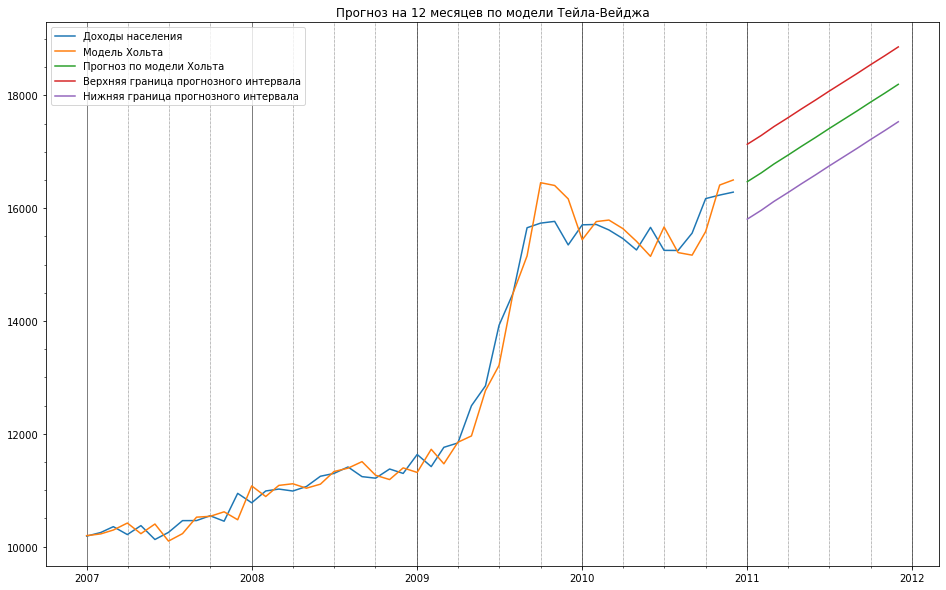

In [115]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(my_data['Value'], label = 'Доходы населения')
ax.plot(model.fittedvalues,label = 'Модель Хольта')
ax.plot(model.predict(start=48, end=59),label = 'Прогноз по модели Хольта')
ax.plot(y_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(y_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Тейла-Вейджа')

plt.show()